# Worksheet 07

Name: Timothy Evdokimov

UID: U98635342

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

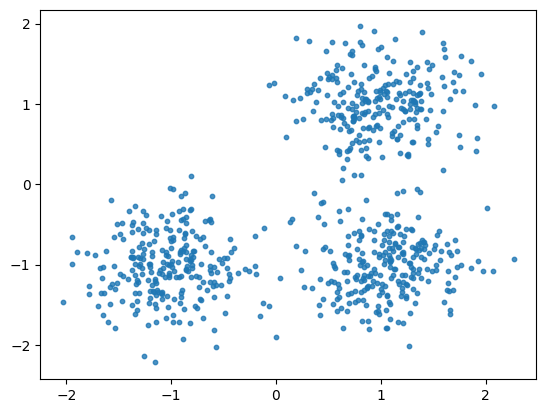

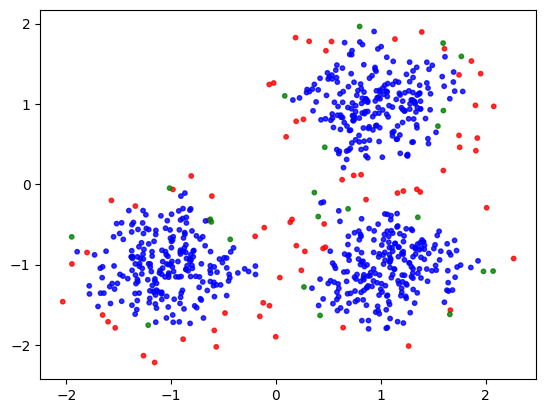

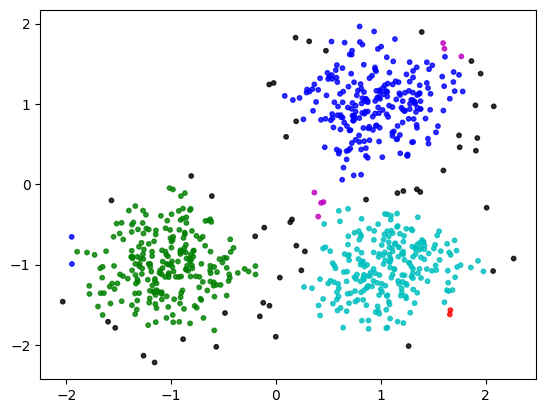

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """

        # 0 = core, 1 = border, 2 = noise
        mapping = [2] * len(self.dataset)
        clusters = [-1] * len(self.dataset)

        for i in range(len(self.dataset)):
            num_pts = 0
            for j in range(len(self.dataset)):
                if i == j:
                    continue

                if np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon:
                    num_pts += 1
                
                    if mapping[j] == 0:
                        mapping[i] = 1
            
            if num_pts > self.min_pts:
                mapping[i] = 0

        plt.scatter(X[:, 0], X[:, 1], color=colors[mapping].tolist(), s=10, alpha=0.8)
        plt.show()
        
        cluster_num = -1
        for i in range(len(self.dataset)):
            if mapping[i] == 0:
                
                existing_cluster = clusters[i]

                for j in range(len(self.dataset)):
                    if np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon:
                        if clusters[j] != -1 and clusters[j] < existing_cluster:
                            existing_cluster = clusters[j]
                
                if existing_cluster == -1:
                    cluster_num += 1
                    clusters[i] = cluster_num
                    for j in range(len(self.dataset)):
                        if np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon:
                            clusters[j] = cluster_num
                else:
                    clusters[i] = existing_cluster
                    for j in range(len(self.dataset)):
                        if np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon:
                            clusters[j] = existing_cluster
        return clusters


clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()